In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("../../data/raw/Video_game_sales_db.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [17]:
dfGR = df[["Rank","Name","Genre","Year","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
dfGR

,Rank,Name,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Wii Sports,Sports,2006.0,41.49,29.02,3.77,8.46
1,2,Super Mario Bros.,Platform,1985.0,29.08,3.58,6.81,0.77
2,3,Mario Kart Wii,Racing,2008.0,15.85,12.88,3.79,3.31
3,4,Wii Sports Resort,Sports,2009.0,15.75,11.01,3.28,2.96
4,5,Pokemon Red/Pokemon Blue,Role-Playing,1996.0,11.27,8.89,10.22,1.00
...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,Platform,2002.0,0.01,0.00,0.00,0.00
16594,16597,Men in Black II: Alien Escape,Shooter,2003.0,0.01,0.00,0.00,0.00
16595,16598,SCORE International Baja 1000: The Official Game,Racing,2008.0,0.00,0.00,0.00,0.00
16596,16599,Know How 2,Puzzle,2010.0,0.00,0.01,0.00,0.00


In [37]:
# Sorting Data by rank,year, and region
dfGR_NA = (
    dfGR[["Rank","Genre","Year","NA_Sales"]]
    .loc[lambda x: x["Year"] >= 2000] # Filter for games in this century
    .loc[lambda x: x["Rank"] <= 2500] # Only looking for games ranked 2500 or less
    .reset_index(drop = True)
)
dfGR_EU = (
    dfGR[["Rank","Genre","Year","EU_Sales"]]
    .loc[lambda x: x["Year"] >= 2000] # Filter for games in this century
    .loc[lambda x: x["Rank"] <= 2500] # Only looking for games ranked 2500 or less
    .reset_index(drop = True)
)
dfGR_JP = (
    dfGR[["Rank","Genre","Year","JP_Sales"]]
    .loc[lambda x: x["Year"] >= 2000] # Filter for games in this century
    .loc[lambda x: x["Rank"] <= 2500] # Only looking for games ranked 2500 or less
    .reset_index(drop = True)
)
dfGR_Other = (
    dfGR[["Rank","Genre","Year","Other_Sales"]]
    .loc[lambda x: x["Year"] >= 2000] # Filter for games in this century
    .loc[lambda x: x["Rank"] <= 2500] # Only looking for games ranked 2500 or less
    .reset_index(drop = True)
)
dfGR.Genre.unique() #To check unique Types of Genres in the Dataframe

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [53]:
dfGR_NA

,Rank,Genre,Year,NA_Sales
0,1,Sports,2006.0,41.49
1,3,Racing,2008.0,15.85
2,4,Sports,2009.0,15.75
3,7,Platform,2006.0,11.38
4,8,Misc,2006.0,14.03
...,...,...,...,...
1972,2495,Sports,2011.0,0.78
1973,2496,Platform,2005.0,0.69
1974,2497,Misc,2008.0,0.77
1975,2498,Strategy,2008.0,0.58


In [77]:
NA_sales = (      
    dfGR_NA
        .loc[dfGR_NA['Genre'] == 'Racing', 'NA_Sales'].sum()
        .loc[dfGR_NA["Genre"] == 'Role-Playing','NA_Sales'].sum()
        .loc[dfGR_NA["Genre"] == 'Puzzle','NA_Sales'].sum()
        .loc[dfGR_NA["Genre"] == 'Misc','NA_Sales'].sum()
        .loc[dfGR_NA["Genre"] == 'Shooter','NA_Sales'].sum()
        .loc[dfGR_NA["Genre"] == 'Simulation','NA_Sales'].sum()
        .loc[dfGR_NA["Genre"] == 'Action','NA_Sales'].sum()
        .loc[dfGR_NA["Genre"] == 'Fighting','NA_Sales'].sum()
        .loc[dfGR_NA["Genre"] == 'Adventure','NA_Sales'].sum()
        .loc[dfGR_NA["Genre"] == 'Strategy','NA_Sales'].sum()
        .loc[dfGR_NA["Genre"] == 'Racing','NA_Sales'].sum()
)

AttributeError: 'numpy.float64' object has no attribute 'loc'

In [ ]:
        .loc[lambda x: x["Genre"] == 'Sports','NA_Sales'].sum()
        .loc[lambda x: x["Genre"] == 'Platform','NA_Sales'].sum()
        .loc[lambda x: x["Genre"] == 'Role-Playing','NA_Sales'].sum()
        .loc[lambda x: x["Genre"] == 'Puzzle','NA_Sales'].sum()
        .loc[lambda x: x["Genre"] == 'Misc','NA_Sales'].sum()
        .loc[lambda x: x["Genre"] == 'Shooter','NA_Sales'].sum()
        .loc[lambda x: x["Genre"] == 'Simulation','NA_Sales'].sum()
        .loc[lambda x: x["Genre"] == 'Action','NA_Sales'].sum()
        .loc[lambda x: x["Genre"] == 'Fighting','NA_Sales'].sum()
        .loc[lambda x: x["Genre"] == 'Adventure','NA_Sales'].sum()
        .loc[lambda x: x["Genre"] == 'Strategy','NA_Sales'].sum()
        .loc[lambda x: x["Genre"] == 'Racing','NA_Sales'].sum()
        
GnS_EU = (
    dfGR_EU[["Genre","EU_Sales"]]
    .groupby('Genre')['EU_Sales'].sum()[dfGR.Genre.unique()]    
)
GnS_JP = (
    dfGR_JP[["Genre","JP_Sales"]]
    .groupby('Genre')['JP_Sales'].sum()[dfGR.Genre.unique()]    
)
GnS_Other = (
    dfGR_Other[["Genre","Other_Sales"]]
    .groupby('Genre')['Other_Sales'].sum()[dfGR.Genre.unique()]    
)
GnS_NA = (
    dfGR_NA[["Genre","NA_Sales"]]
    .groupby('Genre')['NA_Sales'].sum()[dfGR.Genre.unique()]    
)
GnS_NAv2 = (
        dfGR_NA
        .loc[dfGR_NA["Genre"] == 'Role-Playing','NA_Sales'].sum()
        .loc[dfGR_NA["Genre"] == 'Puzzle','NA_Sales'].sum()
        .loc[dfGR_NA["Genre"] == 'Misc','NA_Sales'].sum()
        .loc[dfGR_NA["Genre"] == 'Shooter','NA_Sales'].sum()
        .loc[dfGR_NA["Genre"] == 'Simulation','NA_Sales'].sum()
        .loc[dfGR_NA["Genre"] == 'Action','NA_Sales'].sum()
        .loc[dfGR_NA["Genre"] == 'Fighting','NA_Sales'].sum()
        .loc[dfGR_NA["Genre"] == 'Adventure','NA_Sales'].sum()
        .loc[dfGR_NA["Genre"] == 'Strategy','NA_Sales'].sum()
        .loc[dfGR_NA["Genre"] == 'Racing','NA_Sales'].sum()
)

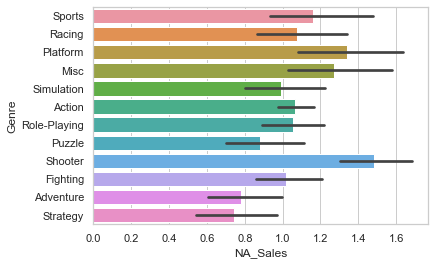

In [59]:
sns.set_theme(style="whitegrid")
NA = sns.barplot(data = dfGR_NA, x= 'NA_Sales',y="Genre")

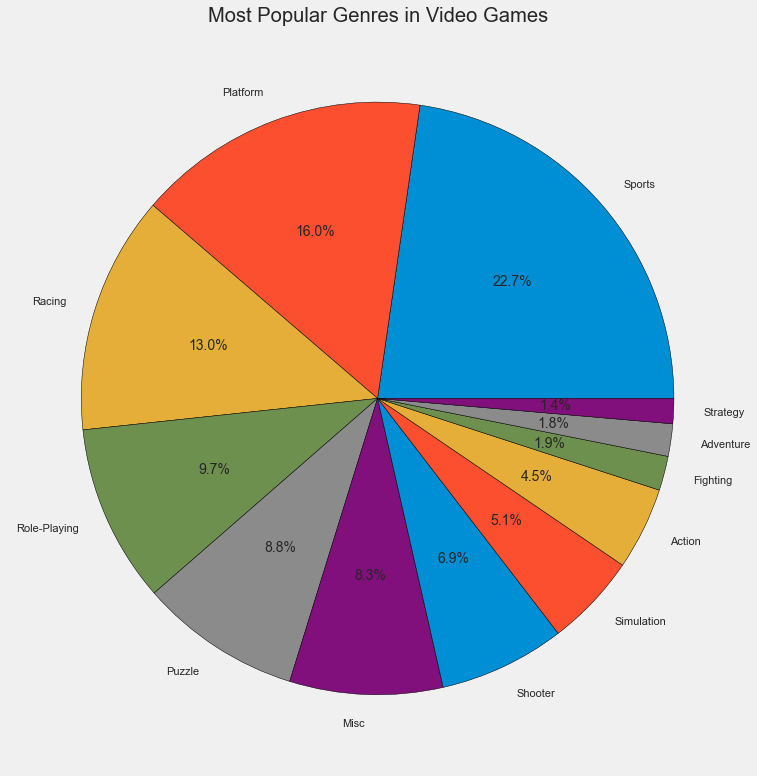

In [74]:
labels = ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy']
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(11,11))
plt.pie(list(dfGR_NA['Genre'].value_counts()), autopct='%1.1f%%', labels=labels, wedgeprops={'edgecolor':'black'})
plt.title('Most Popular Genres in Video Games')
plt.tight_layout()
plt.show()

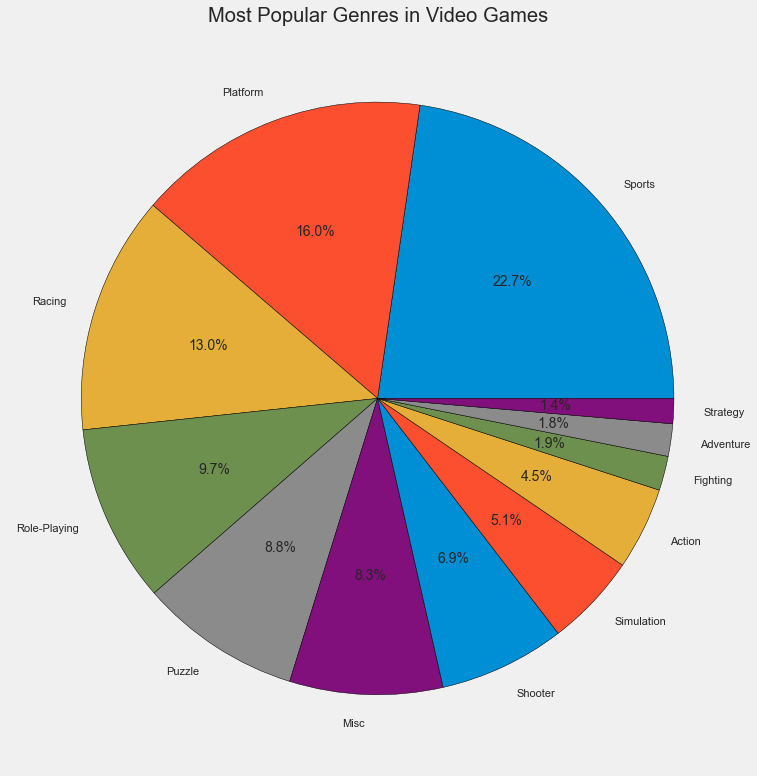

In [72]:
labels = ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy']
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(11,11))
plt.pie(list(dfGR_Other['Genre'].value_counts()), autopct='%1.1f%%', labels=labels, wedgeprops={'edgecolor':'black'})
plt.title('Most Popular Genres in Video Games')
plt.tight_layout()
plt.show()

In [67]:
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)